0. Install and Import Dependencies

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio


/Users/dennislaw/lip_readingenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

1. Build Data Loading Functions

In [4]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [5]:
import cv2
import dlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the pre-trained face detector from dlib
detector = dlib.get_frontal_face_detector()
# Load the facial landmark predictor from dlib
predictor = dlib.shape_predictor("./face_landmarks_model/shape_predictor_68_face_landmarks.dat")

# Function to extract the mouth region from a frame
def extract_mouth(frame, landmarks):
    # Define the mouth region based on the facial landmarks
    mouth_pts = landmarks[48:68]
    # Create a mask for the mouth region
    mask = np.zeros_like(frame)
    cv2.fillPoly(mask, [mouth_pts], (255, 255, 255))
    # Extract the mouth region from the frame using the mask
    mouth = cv2.bitwise_and(frame, mask)
    # Draw landmarks on the frame
    for (x, y) in mouth_pts:
        cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
    # print("Mouth region shape:", mouth.shape)
    return mouth, frame

def load_video_mouth(path:str, output_path:str) -> None: 
    cap = cv2.VideoCapture(path)
    mouth_frames = []
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect faces in the frame
        faces = detector(gray_frame)
        
        for face in faces:
            # Detect facial landmarks for each face
            landmarks = predictor(gray_frame, face)
            landmarks = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)])
            
            # Extract the mouth region from the frame
            mouth_region, _ = extract_mouth(frame, landmarks)
    
            # Write the mouth region to the output video
            out.write(mouth_region)
            

    cap.release()
    out.release()
    cv2.destroyAllWindows()




In [6]:
# import os

# input_dir = "/Users/dennislaw/Downloads/corpus_new_v2/MOVFile"
# output_dir = "/Users/dennislaw/Downloads/mouthMov3s_1"

# # Create the output directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# # Loop over all video files in the input directory
# for filename in os.listdir(input_dir):
#     if filename.endswith(".mov"):
#         input_path = os.path.join(input_dir, filename)
#         output_path = os.path.join(output_dir, filename)
#         print(f"Processing video: {input_path}")
        
#         # Process the video and save the mouth region only
#         load_video(input_path, output_path)

# print("All videos processed and saved with mouth region extracted.")


In [6]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[310:370,300:435,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [8]:
# def load_video(path:str) -> List[float]:
#     cap = cv2.VideoCapture(path)
#     frames = []
    
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
        
#         gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         faces = detector(gray_frame)
        
#         for face in faces:
#             landmarks = predictor(gray_frame, face)
#             landmarks = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)])
#             mouth_pts = landmarks[48:68]
#             min_x = np.min(mouth_pts[:, 0])
#             max_x = np.max(mouth_pts[:, 0])
#             min_y = np.min(mouth_pts[:, 1])
#             max_y = np.max(mouth_pts[:, 1])
            
#             # Ensure the bounding box stays within the boundaries of the frame
#             frame_height, frame_width, _ = frame.shape
#             min_x = max(min_x, 0)
#             max_x = min(max_x, frame_width)
#             min_y = max(min_y, 0)
#             max_y = min(max_y, frame_height)
            
#             # Crop the mouth region
#             mouth_region = frame[min_y:max_y, min_x:max_x]
            
#             # Resize the cropped mouth region to 90x90
#             mouth_region_resized = cv2.resize(mouth_region, (90, 90))

#             mouth_region_resized_gray = cv2.cvtColor(mouth_region_resized, cv2.COLOR_BGR2GRAY)
            
#             # Append the resized mouth region to the list of frames
#             frames.append(mouth_region_resized_gray)
    
#             # # Display the cropped mouth region
#             # cv2.imshow('Cropped Frame', mouth_region_resized)
#             # cv2.waitKey(0)  # Wait indefinitely for a key press
#             # cv2.destroyAllWindows()

#     cap.release()
    
#     mean = tf.math.reduce_mean(frames)
#     std = tf.math.reduce_std(tf.cast(frames, tf.float32))
#     return tf.cast((frames - mean), tf.float32) / std

In [9]:
len(load_video("/Users/dennislaw/Downloads/data_cantonese_new/IMG_2993.mp4"))

91

In [10]:
# def load_video_cth(path:str) -> List[float]: 

#     cap = cv2.VideoCapture(path)
#     frames = []
#     for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
#         ret, frame = cap.read()
#         frame = tf.image.rgb_to_grayscale(frame)
#         frames.append(frame[ 340:400,300:410,:])
#     cap.release()
    
#     mean = tf.math.reduce_mean(frames)
#     std = tf.math.reduce_std(tf.cast(frames, tf.float32))
#     return tf.cast((frames - mean), tf.float32) / std

In [7]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [8]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [9]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [10]:
char_to_num(['n','e','i','1'])
# char_to_num(['tai3', ' ','nei1'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  5,  9, 30])>

In [11]:
num_to_char([14,  5,  9, 30])
# num_to_char([3187])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'e', b'i', b'1'], dtype=object)>

In [16]:
# def load_alignments(path: str) -> List[str]:
#     with open(path, 'r') as f:
#         lines = f.readlines()

#     tokens = []
#     for line in lines:
#         line = line.split()
#         if line[2] != 'sil':
#             tokens.extend([' ', line[2]])

#     # print("Tokens:", tokens)

#     # Use tf.constant to convert the aligned phonemes to a TensorFlow tensor
#     tensor = tf.constant(tokens)
#     # print("Tensor:", tensor)

#     # Process the tensor using char_to_num
#     processed_tensor = char_to_num(tensor)

#     # print("Processed tensor:", processed_tensor)

#     return processed_tensor[1:]


In [12]:
def load_alignments(path: str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()

    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens.extend([' ', line[2]])
    # print("Tokens:", tokens)
    output = char_to_num(tf.reshape(tf.strings.unicode_split(tf.constant(tokens), input_encoding='UTF-8'), (-1)))[1:]
    # print("Processes_tensor:", output)
    # Use tf.constant to convert the list to a TensorFlow tensor
    return output


In [13]:
# def load_data(path: str): 
#     path = bytes.decode(path.numpy())
#     file_name = path.split('/')[-1].split('.')[0]
    
#     if file_name.startswith("IMG_"):
#         img_number = int(file_name.split("_")[1])
#         if (img_number < 500 ):
#             video_path = os.path.join('data_cantonese_mouth', f'{file_name}.mp4')
#             frames = load_video_cth(video_path)
#             alignment_path = os.path.join('data_cantonese_mouth', 'alignment', 's1', f'{file_name}.align')
#             alignments = load_alignments(alignment_path)
#             return frames, alignments

#         else:
#             video_path = os.path.join('data_cantonese', 'mouth', f'{file_name}.mp4')
#             frames = load_video(video_path)
#             alignment_path = os.path.join('data_cantonese', 'alignment', 's1', f'{file_name}.align')
#             alignments = load_alignments(alignment_path)
#             return frames, alignments


In [14]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data_cantonese','s1',f'{file_name}.mp4')
    # video_path = os.path.join('data_cantonese','7s',f'{file_name}.mp4')
    # print(f"Loading data from: {video_path}")
    alignment_path = os.path.join('data_cantonese','alignment','s1',f'{file_name}.align')
    # alignment_path = os.path.join('data_cantonese','alignment','7s',f'{file_name}.align')

    # print(f"Alignment: {alignment_path}")
    frames = load_video(video_path)
    # print(f"Number of frames: {len(frames)}")
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [20]:
# directory_path = "/Users/dennislaw/downloads/data_cantonese_mov"

# # List all files in the directory
# file_list = os.listdir(directory_path)

# # Loop through each file
# for file_name in file_list:
#     # Check if the file is a video file (you may want to refine this check)
#     if file_name.endswith(".mov"):
#         video_path = os.path.join(directory_path, file_name)
        
#         # # Open the video file
#         cap = cv2.VideoCapture(video_path)

#         # # Get the frames per second (fps) of the video
#         fps = cap.get(cv2.CAP_PROP_FPS)
        
#         # # Get the total number of frames in the video
#         # total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#         frames = len(load_video(video_path))
#         if frames < 30:
        
#             print(f"Video: {file_name}")
#             print(f"Frame rate: {fps} fps")
#             print(f"Total frames: {frames}")
#             print("~" * 50)

#         # Release the video capture object
#         cap.release()


In [25]:
test_path = "./data_cantonese/s1/IMG_68.mp4"

In [26]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'IMG_68'

In [27]:
tf.convert_to_tensor(test_path)

<tf.Tensor: shape=(), dtype=string, numpy=b'./data_cantonese/s1/IMG_68.mp4'>

In [28]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [29]:
len(frames)

73

In [30]:
load_data(tf.convert_to_tensor(test_path))

(<tf.Tensor: shape=(73, 60, 135, 1), dtype=float32, numpy=
 array([[[[ 9.4390745 ],
          [ 9.4390745 ],
          [ 9.4390745 ],
          ...,
          [ 9.307976  ],
          [ 9.74497   ],
          [10.094565  ]],
 
         [[ 9.4390745 ],
          [ 9.657571  ],
          [ 9.570172  ],
          ...,
          [ 9.701271  ],
          [ 9.701271  ],
          [ 9.74497   ]],
 
         [[ 9.526473  ],
          [ 9.701271  ],
          [10.007167  ],
          ...,
          [10.53156   ],
          [10.53156   ],
          [10.53156   ]],
 
         ...,
 
         [[ 0.6991907 ],
          [ 0.61179185],
          [ 0.43699417],
          ...,
          [ 0.83028895],
          [ 0.83028895],
          [ 0.83028895]],
 
         [[ 0.48069358],
          [ 0.48069358],
          [ 0.48069358],
          ...,
          [ 0.7428901 ],
          [ 0.7428901 ],
          [ 0.7428901 ]],
 
         [[ 0.48069358],
          [ 0.48069358],
          [ 0.48069358],
          

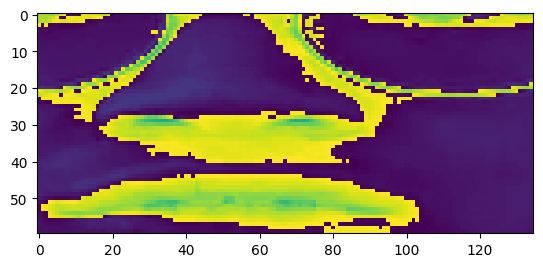

In [31]:
plt.imshow(frames[10])

In [32]:
alignments

<tf.Tensor: shape=(15,), dtype=int64, numpy=array([10, 25, 21, 33, 39,  4,  1,  1, 14, 31, 39,  6,  1, 14, 31])>

In [33]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'jyu4 daan2 fan2'>

In [15]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

2. Create Data Pipeline

In [16]:
from matplotlib import pyplot as plt

In [17]:
data = tf.data.Dataset.list_files('./data_cantonese/s1/*.mp4')
# data = tf.data.Dataset.list_files('./7sVideoData150Mp4/*.mp4')
data = data.shuffle(709, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,60,135,1],[None]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
# Determine the sizes for training and testing sets
total_samples = 354
train_size = int(0.8 * total_samples)

# Split the data
train_data = data.take(train_size)
test_data = data.skip(train_size)

In [18]:
# data = tf.data.Dataset.list_files('./data_cantonese/7s/*.mp4')
# data = data.shuffle(600, reshuffle_each_iteration=False)
# data = data.map(mappable_function)
# data = data.padded_batch(2, padded_shapes=([175,60,135,1],[None]))
# data = data.prefetch(tf.data.AUTOTUNE)
# # Added for split 
# # Determine the sizes for training and testing sets
# total_samples = 300
# train_size = int(0.8 * total_samples)

# # Split the data
# train_data = data.take(train_size)
# test_data = data.skip(train_size)

In [19]:
frames, alignments = data.as_numpy_iterator().next()

In [20]:
data.as_numpy_iterator().next()

(array([[[[[10.313024  ],
           [ 9.872296  ],
           [ 9.299351  ],
           ...,
           [ 0.2644365 ],
           [ 0.352582  ],
           [ 0.39665475]],
 
          [[10.57746   ],
           [10.930042  ],
           [ 0.13221826],
           ...,
           [ 0.22036377],
           [ 0.22036377],
           [ 0.22036377]],
 
          [[ 0.83738226],
           [ 0.83738226],
           [ 0.83738226],
           ...,
           [ 0.13221826],
           [ 0.13221826],
           [ 0.176291  ]],
 
          ...,
 
          [[ 0.30850926],
           [ 0.30850926],
           [ 0.30850926],
           ...,
           [11.106334  ],
           [11.106334  ],
           [11.106334  ]],
 
          [[ 0.352582  ],
           [ 0.352582  ],
           [ 0.30850926],
           ...,
           [11.062261  ],
           [11.062261  ],
           [11.062261  ]],
 
          [[ 0.39665475],
           [ 0.352582  ],
           [ 0.352582  ],
           ...,
           [11

In [21]:
len(frames)

2

In [22]:
sample = data.as_numpy_iterator()

In [23]:
val = sample.next(); val[0]

array([[[[[0.7270554 ],
          [0.7270554 ],
          [0.7270554 ],
          ...,
          [0.6301146 ],
          [0.6301146 ],
          [0.6301146 ]],

         [[0.6301146 ],
          [0.678585  ],
          [0.678585  ],
          ...,
          [0.6301146 ],
          [0.6301146 ],
          [0.6301146 ]],

         [[0.5816443 ],
          [0.5816443 ],
          [0.678585  ],
          ...,
          [0.6301146 ],
          [0.6301146 ],
          [0.6301146 ]],

         ...,

         [[0.7755257 ],
          [0.7270554 ],
          [0.7270554 ],
          ...,
          [0.09694071],
          [0.09694071],
          [0.09694071]],

         [[0.96940714],
          [0.92093676],
          [0.87246644],
          ...,
          [0.14541107],
          [0.24235179],
          [0.14541107]],

         [[0.96940714],
          [0.96940714],
          [0.92093676],
          ...,
          [0.24235179],
          [0.24235179],
          [0.24235179]]],


        [[[0.7270

In [24]:
len(val[0])

2

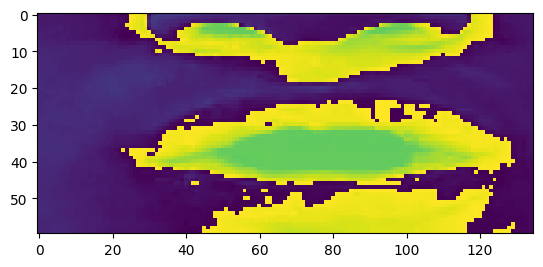

In [25]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][20])

In [26]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'hou2 hou2 teng1'>

3.Design the Deep Neural Network

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

In [28]:
data.as_numpy_iterator().next()[0][0].shape

(75, 60, 135, 1)

In [29]:
def create_lip_reading_model(input_shape, num_classes):
    model = Sequential()
    # Modified 3D CNN (ResNet-18 style)
    model.add(Conv3D(128, 3, input_shape=input_shape, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((1, 2, 2)))

    model.add(Conv3D(256, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((1, 2, 2)))

    model.add(Conv3D(75, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((1, 2, 2)))

    model.add(TimeDistributed(Flatten()))
    # Bi-LSTM (RNN)
    model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(0.5))

    model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(0.5))
    
    # Densely Connected TCN
    model.add(Dense(num_classes, kernel_initializer='he_normal', activation='softmax'))

    return model


In [30]:
input_shape = (75,60,135,1)  # Modify based on actual input shape
num_classes =  char_to_num.vocabulary_size()+1 # Replace with the actual number of classes

In [31]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [32]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [33]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset
        self.dataset_iterator = None
        self.checkpoint_directory = "./saved_models/tested_model_7s_0"
    def on_epoch_begin(self, epoch, logs=None) -> None:
        # Create a new iterator at the beginning of each epoch
        self.dataset_iterator = self.dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        # Get the next batch of data from the iterator
        data = self.dataset_iterator.next()

        # Make predictions using the trained model
        yhat = self.model.predict(data[0])

        # Decode the predicted sequences using CTC decoding
        decoded = tf.keras.backend.ctc_decode(yhat, [75, 75], greedy=False)[0][0].numpy()

        total_samples = len(decoded)
        correct_predictions = 0

        for x in range(total_samples):
            original_str = tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8')
            prediction_str = tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8')

        # Tokenize strings into words
            original_words = original_str.split()
            prediction_words = prediction_str.split()
    
        # Calculate accuracy based on correct words
            correct_words = sum(1 for word in original_words if word in prediction_words)
            accuracy = correct_words / len(original_words) if len(original_words) > 0 else 0.0
    
            
            print('Original:', original_str)
            print('Prediction:', prediction_str)
            print('Accuracy:', accuracy * 100)
            print('~' * 100)

         # Save the last epoch to a text file
        last_epoch_path = os.path.join(self.checkpoint_directory, 'last_epoch.txt')
        current_epoch = 1
        if os.path.exists(last_epoch_path):
            with open(last_epoch_path, 'r') as file:
                current_epoch = int(file.read())
        
        # Increase the epoch by one
        new_epoch = current_epoch + 1
        
        # Write the new epoch value back to the file
        with open(last_epoch_path, 'w') as file:
            file.write(str(new_epoch))
        


In [34]:
checkpoint_callback = ModelCheckpoint(
    os.path.join('saved_models','tested_model_7s_0','checkpoint'),
    monitor='loss', 
    save_weights_only=False, 
    mode='min',
    save_best_only=True,) 

In [35]:
schedule_callback = LearningRateScheduler(scheduler)

In [36]:
example_callback = ProduceExample(test_data)

In [37]:
callbacks = [checkpoint_callback, schedule_callback, example_callback]

In [38]:
tf.keras.utils.get_custom_objects()['CTCLoss'] = CTCLoss


In [39]:
from tensorflow.keras.models import load_model

In [58]:
from tensorflow.keras.models import load_model
custom_objects = {'CTCLoss': CTCLoss}
checkpoint_directory = './saved_models/tested_model_7s_0'
# Ensure the checkpoint directory exists; if not, create it
os.makedirs(checkpoint_directory, exist_ok=True)
# Specify the checkpoint file path
checkpoint_path = os.path.join(checkpoint_directory, 'checkpoint')
last_epoch_path = os.path.join(checkpoint_directory, 'last_epoch.txt')
# Check if there is a checkpoint file
if os.path.exists(checkpoint_path):
    print("Checkpoint exists in models.")
    # Read the last epoch from the text file
    if os.path.exists(last_epoch_path):
        with open(last_epoch_path, 'r') as file:
            last_epoch = int(file.read())
        print("Last epoch:", last_epoch)
    else:
        last_epoch = 1
        print("No last_epoch.txt found. Starting from epoch 1.")
    model = load_model(checkpoint_path,  custom_objects=custom_objects)
    # Transfer weights from the loaded model to the new model
    # model.set_weights(model.get_weights())
    # model.load_model(checkpoint_path, custom_objects=custom_objects)
    # model = create_lip_reading_model(input_shape, num_classes)
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
                    loss=CTCLoss)
    model.fit(train_data, epochs=50-last_epoch, validation_data=test_data, callbacks=callbacks)

else:
    model = create_lip_reading_model(input_shape, num_classes)
    print("No checkpoint found. Creating a new model.")


No checkpoint found. Creating a new model.


In [ ]:
# model = create_lip_reading_model(input_shape, num_classes)

In [ ]:
model.summary()

In [ ]:
yhat = model.predict(val[0])

In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

In [ ]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

In [ ]:
model.input_shape

In [ ]:
model.output_shape

4. Setup Training Options and Train

In [ ]:
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss=CTCLoss )

In [ ]:
# model.fit(train_data, validation_data=test_data, epochs=50, callbacks=callbacks)

5. Testing 

In [58]:
loaded_model = tf.keras.models.load_model('/Users/dennislaw/Downloads/tested_model_4/checkpoint')

In [59]:
import tensorflow as tf

# Define your set of Cantonese phonemes using patterns for initials, finals, and tones
cantonese_phonemes = {}

# Generalize initial patterns (e.g., 'b' for labial, 'd' for dental, etc.)
initials = ['b', 'p', 'm', 'f', 'd', 't', 'n', 'l', 'g', 'k', 'ng', 'h', 'gw', 'kw', 'w', 'z', 'c', 's', 'j']
finals = ['aa', 'aai', 'aau', 'aam', 'aan', 'aang', 'aap', 'aat', 'aak', 'ai', 'au', 'am', 'an', 'ang', 'ap', 'at', 'ak', 'e', 'ei','eoi', 'eu', 'em', 'eng', 'ep', 'ek', 'i', 'iu', 'im', 'in', 'ing', 'ip', 'it', 'ik', 'o', 'oi', 'ou', 'on', 'ong', 'ot', 'ok', 'u', 'ui', 'un', 'ung', 'ut', 'uk', 'oe', 'oey', 'oen', 'oeng', 'oet', 'oek', 'y', 'yn', 'yn', 'm', 'ng']
tones = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

# Generate the Cantonese phonemes using combinations of initials, finals, and tones
for initial in initials:
    for final in finals:
        for tone in tones:
            # Create the key as a combination of initial, final, and tone
            key = initial + final + tone
            # Assign a unique integer representation for the key
            value = len(cantonese_phonemes)
            cantonese_phonemes[key] = value

# Define your TensorFlow/Keras StringLookup layers using the Cantonese phonemes vocabulary size
vocab_size = len(cantonese_phonemes)
phoneme_list = list(cantonese_phonemes.keys())  # Convert keys to list
phoneme_list.append(" ")



In [70]:
from Levenshtein import distance
import matplotlib.pyplot as plt

total_accuracy = 0
num_samples = 0
accuracy_list = []
sample_count_list = []
data_no = 0;

for sample in test_data.as_numpy_iterator():
    # Predict the output
    yhat = loaded_model.predict(sample[0])
    
    # Determine input length based on the shape of the input data
    input_length = [sample[0].shape[1]] * sample[0].shape[0]

    # Decode the predictions
    decoded = tf.keras.backend.ctc_decode(yhat, input_length=input_length, greedy=True)[0][0].numpy()

    total_samples = len(decoded)
    correct_predictions = 0
    total_words = 0
    
    for x in range(total_samples):
        original_str = tf.strings.reduce_join([num_to_char(word) for word in sample[1][x]]).numpy().decode('utf-8')
        prediction_str = tf.strings.reduce_join([num_to_char(word) for word in decoded[x]]).numpy().decode('utf-8')
    
        # Tokenize strings into words
        original_words = original_str.split()
        prediction_words = prediction_str.split()
    
        # Initialize list to store best predictions for each word
        best_predictions = []
        
        # Calculate similarity between each predicted word and Cantonese phonemes
        for original_word, predicted_word in zip(original_words, prediction_words):
            # Calculate distance only if words are different
            if original_word != predicted_word:
                similarities = {}
                for phoneme in phoneme_list:
                    similarities[phoneme] = distance(predicted_word, phoneme)
                # Find the phoneme with the lowest distance (highest similarity)
                best_prediction = min(similarities, key=similarities.get)
                best_predictions.append(best_prediction)
            else:
                best_predictions.append(predicted_word)
        
        # Combine best predictions into a single string
        best_prediction_str = ' '.join(best_predictions)
        
        # Calculate accuracy based on correct words
        correct_words = sum(1 for original_word, predicted_word in zip(original_words, best_predictions) 
                            if original_word == predicted_word)
        accuracy = correct_words / len(original_words) if len(original_words) > 0 else 0.0
        accuracy_list.append(accuracy)
        data_no += 1
        sample_count_list.append(data_no)

        
        # Update correct predictions count and total words
        correct_predictions += correct_words
        total_words += len(original_words)
    
        print('Original:', original_str)
        print('Prediction:', prediction_str)
        print('Best Prediction:', best_prediction_str)
        print('Accuracy:', accuracy * 100)
        print('~' * 100)
    
    # Update total accuracy and number of samples
    total_accuracy += correct_predictions / total_words
    num_samples += 1
    # sample_count_list.append(num_samples)

# Calculate average accuracy
average_accuracy = total_accuracy / num_samples * 100


print("Number of testdata:", num_samples)
print("Average Accuracy:", average_accuracy)


1/1 [==============================] - 2s 2s/step
Original: daai3 mou6 zi2
Prediction: daai3 mou6 zi2
Best Prediction: daai3 mou6 zi2
Accuracy: 100.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: dou1 si5 jan4
Prediction: dou1 si5 jan4
Best Prediction: dou1 si5 jan4
Accuracy: 100.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1/1 [==============================] - 2s 2s/step
Original: gung1 sam1 gai3
Prediction: gng1 sam1 gai3
Best Prediction: gng1 sam1 gai3
Accuracy: 66.66666666666666
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: do1 ze6 saai3
Prediction: do1 ze6 saai3
Best Prediction: do1 ze6 saai3
Accuracy: 100.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1/1 [==============================] - 2s 2s/step
Original: daan2 gou1 dim3
Prediction: d

In [ ]:
import numpy as np

# Convert accuracy list to numpy array
accuracy_array = np.array(accuracy_list)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(accuracy_array * 100, bins=10, range=(0, 100), edgecolor='black')
plt.title('Distribution of Accuracy')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 10))
plt.grid(True)
plt.show()


In [ ]:
# video_path =  '/Users/dennislaw/Downloads/7sVideoData150Mp4/IMG_21.mp4'

In [65]:
video_path =  './data_cantonese/s1/IMG_160.mp4'

In [66]:
preprocessed_data = load_video(video_path)

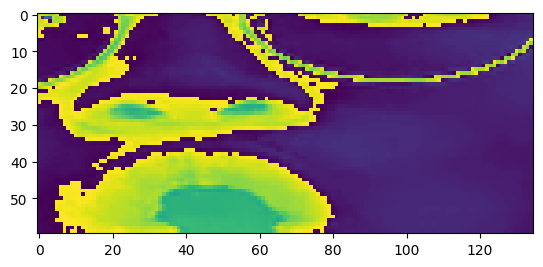

In [67]:
plt.imshow(preprocessed_data[15])

In [63]:
preprocessed_data.shape

TensorShape([75, 60, 135, 1])

In [68]:
# loaded_model = create_lip_reading_model((preprocessed_data.shape[0],60,135,1), num_classes)

In [69]:
# new_input_shape = (75, 60, 135, 1)
yhat = loaded_model.predict(tf.expand_dims(preprocessed_data, axis=0))
    
    # Determine input length based on the shape of the input data
input_length = [preprocessed_data.shape[0]]

    # Decode the predictions
decoded = tf.keras.backend.ctc_decode(yhat, input_length=input_length, greedy=True)[0][0].numpy()

total_samples = len(decoded)
correct_predictions = 0
total_words = 0
    
for x in range(total_samples):
        # original_str = tf.strings.reduce_join([num_to_char(word) for word in sample[1][x]]).numpy().decode('utf-8')
        prediction_str = tf.strings.reduce_join([num_to_char(word) for word in decoded[x]]).numpy().decode('utf-8')
    
        # Tokenize strings into words
        # original_words = original_str.split()
        prediction_words = prediction_str.split()
    
        # Initialize list to store best predictions for each word
        # best_predictions = []
        
         # Calculate similarity between each predicted word and Cantonese phonemes
        # for original_word, predicted_word in zip(original_words, prediction_words):
        #     # Calculate distance only if words are different
        #     if original_word != predicted_word:
        #         similarities = {}
        #         for phoneme in phoneme_list:
        #             similarities[phoneme] = distance(predicted_word, phoneme)
        #         # Find the phoneme with the lowest distance (highest similarity)
        #         best_prediction = min(similarities, key=similarities.get)
        #         best_predictions.append(best_prediction)
        #     else:
        #         best_predictions.append(predicted_word)
        
        # Combine best predictions into a single string
        # best_prediction_str = ' '.join(best_predictions)
        
        # Calculate accuracy based on correct words
        # correct_words = sum(1 for original_word, predicted_word in zip(original_words, best_predictions) 
        #                     if original_word == predicted_word)
        # accuracy = correct_words / len(original_words) if len(original_words) > 0 else 0.0
        
        # Update correct predictions count and total words
        # correct_predictions += correct_words
        # total_words += len(original_words)
        # print('Original:', original_str)
        print('Prediction:', prediction_str)
        # print('Best Prediction:', best_prediction_str)
        # print('Accuracy:', accuracy * 100)
        print('~' * 100)

1/1 [==============================] - 2s 2s/step
Prediction: hung3 bo1 bso1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
